In this file I'm going to practice basic Pandas commands, methods and tricks. Sample file created in Excel is taken from Nicolas Vandeput's book called Inventory Optimization. It represents the data of car sales in Norway.

In [29]:
import pandas as pd
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sidetable
import calendar

In [2]:
pd.set_option('display.width', 150)
pd.options.display.max_colwidth = 150

In [3]:
df = pd.read_csv(r'C:\Playground\norway_new_car_sales_by_make.csv')

In [4]:
df.sample(5)

,Year,Month,Make,Quantity,Pct
1079,2009,5,Opel,426,5.7
1892,2011,3,Opel,526,4.1
191,2007,6,Ford,772,7.0
21,2007,1,MINI,26,0.2
1937,2011,4,Subaru,143,1.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


Above we can see that there are 10 rows with missing data in Make column: 4367 instead of 4377.

In [6]:
df[df.Make.isna()]

,Year,Month,Make,Quantity,Pct
37,2007,1,NaN,1,0.0
112,2007,3,NaN,1,0.0
265,2007,7,NaN,1,0.0
419,2007,11,NaN,1,0.0
1256,2009,9,NaN,4,0.0
1294,2009,10,NaN,4,0.0
2399,2012,4,NaN,1,0.0
2478,2012,6,NaN,1,0.0
2517,2012,7,NaN,1,0.0
3013,2013,9,NaN,1,0.0


We will drop the rows where elements in at least one column are missing. In our case this is Make column.

In [7]:
df.dropna(inplace=True)

Let us learn the scale of data we're processing.

In [8]:
print('First year:',df['Year'].min(),'\nLast year:',df['Year'].max())

First year: 2007 
Last year: 2017


First of all we'll get a quick overview of sales performance within given years: 2007 - 2017.

In [9]:
dfSales = df[['Year','Quantity']].groupby(by='Year',as_index=False).sum()

<AxesSubplot:title={'center':'Car sales volume between 2007 and 2017'}, xlabel='Year'>

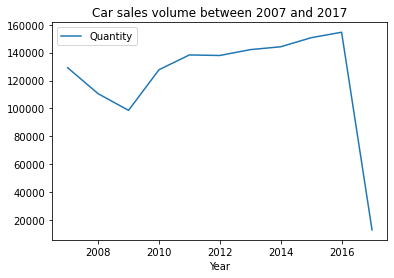

In [10]:
dfSales.plot(x='Year',y='Quantity',title='Car sales volume between 2007 and 2017')

We can see a huge drop in sales after 2016. It may be caused by an incomplete amount of data available for 2017. 

Besides that we can see an obvious sales decrease between 2008 and 2010. It may have been caused by automotive industry crisis that took place exactly in these years. It has mainly affected USA, but European countries, including Norway, have also felt the recession.

Let us check the number of months for each year represented in the data set.

In [11]:
dfMonths = pd.pivot_table(df,columns='Year',values='Month',aggfunc=pd.Series.nunique)

In [12]:
print(dfMonths)

Year   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017
Month    12    12    12    12    12    12    12    12    12    12     1


As we can see, data for only one month is available in 2017. All previous years have a complete set of months.

For that reason I'm going to filter out 2017 from the dataset and use a bit shortened version for further analysis.

In [13]:
dfS = df[df.Year < 2017] # S for Short

Now we will make the next step and see how different carmakers performed during these years. 

First of all, which carmakers do we have in our dataset?

In [14]:
dfS.Make.unique()

array(['Toyota', 'Volkswagen', 'Peugeot', 'Ford', 'Volvo', 'Skoda',
       'Opel', 'Audi', 'Honda', 'Mercedes-Benz', 'BMW', 'Citroen',
       'Suzuki', 'Mazda', 'Saab', 'Renault', 'Mitsubishi', 'Nissan',
       'Hyundai', 'Kia', 'Dodge', 'MINI', 'Subaru', 'Lexus', 'Chevrolet',
       'Alfa Romeo', 'Daihatsu', 'Land Rover', 'Fiat', 'Chrysler',
       'Iveco', 'Jaguar', 'Jeep', 'Nilsson', 'Think', 'Smart',
       'Ssangyong', 'Chevrolet US', 'Porsche', 'Cadillac', 'Aston Martin',
       'Morgan', 'Bentley', 'Lancia', 'Maserati', 'Isuzu', 'Ferrari',
       'Koenigsegg', 'Lamborghini', 'Seat', 'Tesla', 'Tata', 'Dacia',
       'Infiniti', 'Lotus', 'Secma', 'Martin Motors', 'Fisker',
       'Westfield', 'Mia', 'McLaren', 'Binz', 'Tazzari', 'Polaris', 'DS'],
      dtype=object)

There are plenty of them. Let us see which of them have performed at their best within the whole period. We will do it with a utility library called Sidetable. I've imported it at the beginning of the script.

In [93]:
dfS.stb.freq(['Make'],value='Quantity',thresh=80,other_label='Remaining carmakers',style=True)

,Make,Quantity,percent,cumulative_Quantity,cumulative_percent
0,Volkswagen,"204,981",15.36%,"204,981",15.36%
1,Toyota,"166,651",12.49%,"371,632",27.85%
2,Ford,"99,096",7.43%,"470,728",35.28%
3,Volvo,"98,779",7.40%,"569,507",42.69%
4,BMW,"71,775",5.38%,"641,282",48.07%
5,Audi,"69,910",5.24%,"711,192",53.31%
6,Skoda,"65,326",4.90%,"776,518",58.20%
7,Nissan,"63,920",4.79%,"840,438",62.99%
8,Peugeot,"60,462",4.53%,"900,900",67.52%
9,Mercedes-Benz,"56,587",4.24%,"957,487",71.77%


Above we have Top 11 carmakers that account for 80% of total sales. The leader is Volkswagen. Its sales volumes make up 15% of the total sales within the whole period.

Now we are going to find a best-selling carmaker in each year from 2007 to 2016.

In [16]:
dfR = dfS.groupby(['Year','Make'],as_index=False)['Quantity'].sum() # R for Rating

In [17]:
dfR = dfR[dfR['Quantity'] == dfR.groupby('Year')['Quantity'].transform('max')].sort_values(by=['Year'],ascending=False).reset_index(drop=True)

In [18]:
print(dfR)

   Year        Make  Quantity
0  2016  Volkswagen     26574
1  2015  Volkswagen     26344
2  2014  Volkswagen     21659
3  2013  Volkswagen     19130
4  2012  Volkswagen     20507
5  2011  Volkswagen     20898
6  2010  Volkswagen     19172
7  2009      Toyota     14605
8  2008  Volkswagen     16741
9  2007      Toyota     20683


As we can see above, Volkswagen has become the top-selling carmaker almost in each year except 2009 and 2007. Toyota performed better in these years. 

Let us visualize it with a barchart.

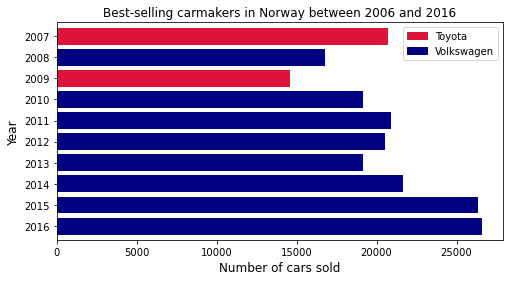

In [19]:
dfR.plot.barh(figsize=(8,4),x='Year',y='Quantity',width=0.8,legend=None,
              color=['navy','navy','navy','navy','navy','navy','navy','crimson','navy','crimson'])


plt.title('Best-selling carmakers in Norway between 2006 and 2016')
plt.xlabel('Number of cars sold',size=12)
plt.ylabel('Year',size=12)

red_patch = mpatches.Patch(color='crimson', label='Toyota')
blue_patch = mpatches.Patch(color='navy', label='Volkswagen')

plt.legend(handles=[red_patch, blue_patch])
# plt.rcParams["legend.fontsize"] = 11


plt.show()

As we can see above, Toyota hasn't shown big numbers in 2009, although it was enough to leave Volswagen behind. Besides that, Toyota sales were rather high in 2007. It may happen that Volkswagen performance was only a bit weaker, so we need to find a gap between two brands in 2007 and 2009.

In [20]:
dfC = dfS.groupby(['Year','Make'],as_index=False)['Quantity'].sum() # C for Comparison

In [21]:
dfC = dfC[(dfC.Year.isin([2007,2009])) & (dfC.Make.isin(['Volkswagen','Toyota']))]

In [22]:
dfC['Gap'] = ''
dfC.iloc[0,3] = dfC.iloc[0,2] - dfC.iloc[1,2] # Gap value for 2007
dfC.iloc[2,3] = dfC.iloc[2,2] - dfC.iloc[3,2] # Gap value for 2009

In [23]:
dfC

,Year,Make,Quantity,Gap
43,2007,Toyota,20683,994
44,2007,Volkswagen,19689,
136,2009,Toyota,14605,338
137,2009,Volkswagen,14267,


As you can see above, gap between brands' sales in both 2007 and 2009 is less than 1,000 cars. The competition seems to be close, so I want to see the gap for all the years. Line chart is likely to provide a clear overview.

In [24]:
dfVT = pd.pivot_table(dfS[dfS.Make.isin(['Volkswagen','Toyota'])],index='Year',columns='Make',values=['Quantity'],aggfunc='sum')

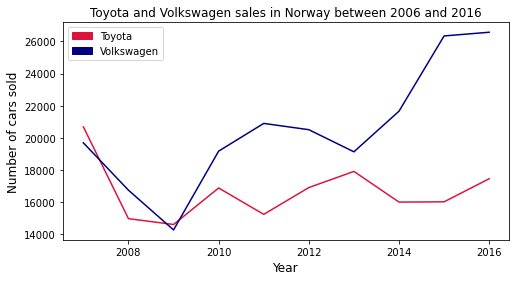

In [25]:
dfVT.plot(figsize=(8,4),legend=None,color=['crimson','navy'])

plt.title('Toyota and Volkswagen sales in Norway between 2006 and 2016')
plt.ylabel('Number of cars sold',size=12)
plt.xlabel('Year',size=12)

red_patch = mpatches.Patch(color='crimson', label='Toyota')
blue_patch = mpatches.Patch(color='navy', label='Volkswagen')

plt.legend(handles=[red_patch, blue_patch]) # custom legend created for this chart

plt.show()

Line chart shows us that volumes in 2007 and 2009 were just lucky ones for Toyota. In all remaining years Volkswagen was more succesful and the gap was more sufficient.

Now we are going to find the most profitable months for Volkswagen.

Before that we will add a column with month names. As you may have noticed, currently months in column Month are displayed as numbers. You still can understand which month is mentioned, but it's the best approach.

In order to add months' names I've imported a module called *calendar*.

In [30]:
months = []


for value in dfS.Month:
    months.append(calendar.month_abbr[value]) # this loops adds a name of month to a list using module calendar
    
dfS.loc[:, ['MonthName']] = months

dfS = dfS[['Year','Month','MonthName','Make','Quantity','Pct']] # changing the order of columns

Now we have a new column with a month name abbreviation. Let us use it in x-axis in the chart.

In [66]:
dfM = dfS[(dfS.Make == 'Volkswagen') & (dfS.Year == 2016)].groupby(['Month','MonthName'],as_index=False)['Quantity'].sum()

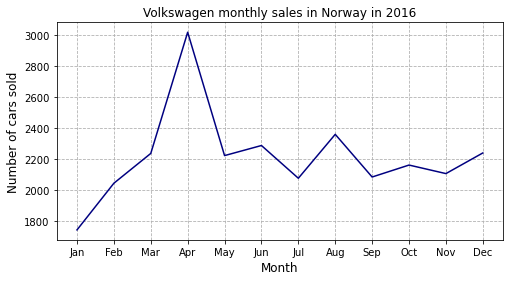

In [80]:
dfM.plot(figsize=(8,4),x='Month',color='navy',legend=None)

plt.title('Volkswagen monthly sales in Norway in 2016')
plt.ylabel('Number of cars sold',size=12)
plt.xlabel('Month',size=12)

plt.xticks(ticks=dfM.Month,labels=dfM.MonthName)   # name of months are displayed instead of their number orders
plt.grid(axis='both', which='both',linestyle='--')

plt.show()

On the chart we observe the lowest sales in January (~1800 cars) and the peak in April (~3000 cars). 

Sales in the following months are rather stable.